In [1]:
print(__doc__)

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import metrics

Automatically created module for IPython interactive environment


# K-means 

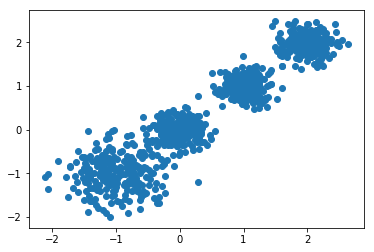

In [2]:
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本4个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.4, 0.2, 0.2, 0.2], 
                  random_state =9)
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

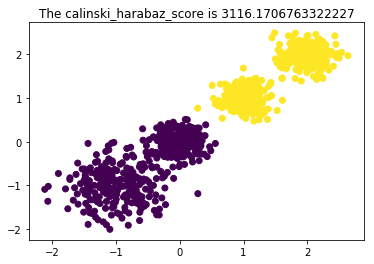

In [3]:
# 现在我们来用K-Means聚类方法来做聚类，首先选择k=2，代码如下：
y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

score = metrics.calinski_harabaz_score(X, y_pred) 
plt.title('The calinski_harabaz_score is {0}'.format(score))
plt.show()

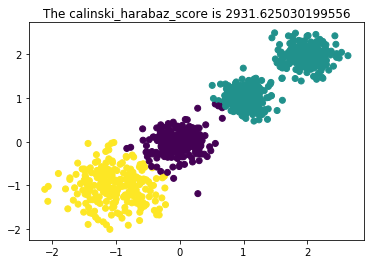

In [4]:
# 现在我们来用K-Means聚类方法来做聚类，首先选择k=3，代码如下：
y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

score = metrics.calinski_harabaz_score(X, y_pred) 
plt.title('The calinski_harabaz_score is {0}'.format(score))
plt.show()

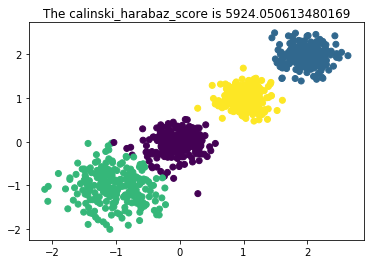

In [5]:
# 现在我们来用K-Means聚类方法来做聚类，首先选择k=4，代码如下：
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

score = metrics.calinski_harabaz_score(X, y_pred) 
plt.title('The calinski_harabaz_score is {0}'.format(score))
plt.show()

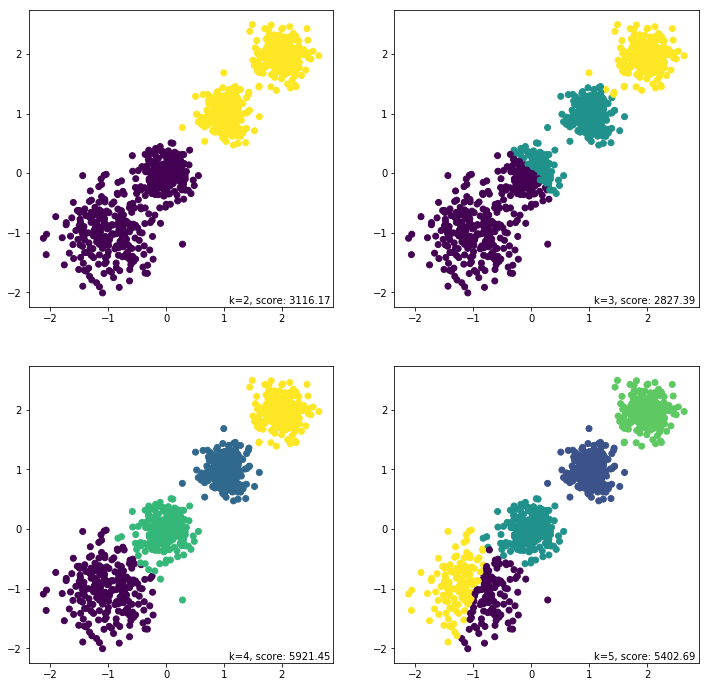

In [6]:
# 现在我们再看看用MiniBatchKMeans的效果，我们将batch size设置为200. 由于我们的4个簇都是凸的，所以其实batch size的值只要不是非常的小，对聚类的效果影响不大。
from sklearn.cluster import MiniBatchKMeans
plt.figure(figsize=(12,12))
for index, k in enumerate((2,3,4,5)):
    plt.subplot(2,2,index+1)
    y_pred = MiniBatchKMeans(n_clusters=k, batch_size = 200, random_state=9).fit_predict(X)
    score= metrics.calinski_harabaz_score(X, y_pred)  
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.text(.99, .01, ('k=%d, score: %.2f' % (k,score)),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')
plt.show()


### Demonstration of k-means assumptions
This example is meant to illustrate situations where k-means will produce unintuitive and possibly unexpected clusters. In the first three plots, the input data does not conform to some implicit assumption that k-means makes and undesirable clusters are produced as a result. In the last plot, k-means returns intuitive clusters despite unevenly sized blobs.

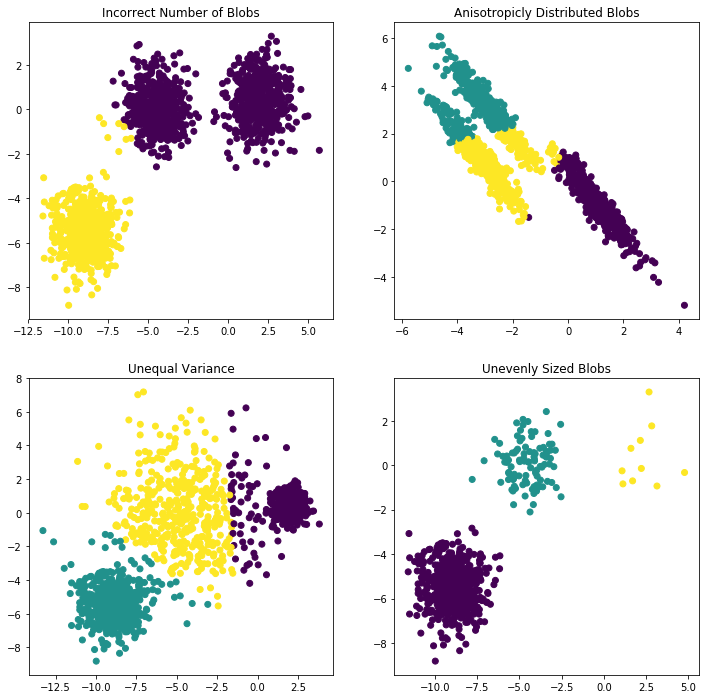

In [73]:
plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")


# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")


# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")


# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

# Mini Batch
在统的K-Means算法中，要计算所有的样本点到所有的质心的距离。如果样本量非常大，比如达到10万以上，特征有100以上，此时用传统的K-Means算法非常的耗时，就算加上elkan K-Means优化也依旧。在大数据时代，这样的场景越来越多。此时Mini Batch K-Means应运而生。

顾名思义，Mini Batch，也就是用样本集中的一部分的样本来做传统的K-Means，这样可以避免样本量太大时的计算难题，算法收敛速度大大加快。当然此时的代价就是我们的聚类的精确度也会有一些降低。一般来说这个降低的幅度在可以接受的范围之内。

在Mini Batch K-Means中，我们会选择一个合适的批样本大小batch size，我们仅仅用batch size个样本来做K-Means聚类。那么这batch size个样本怎么来的？一般是通过无放回的随机采样得到的。

为了增加算法的准确性，我们一般会多跑几次Mini Batch K-Means算法，用得到不同的随机采样集来得到聚类簇，选择其中最优的聚类簇。







该算法的迭代步骤有两步：

1：从数据集中随机抽取一些数据形成小批量，把他们分配给最近的质心

2：更新质心

与K均值算法相比，数据的更新是在每一个小的样本集上。对于每一个小批量，通过计算平均值得到更新质心，并把小批量里的数据分配给该质心，随着迭代次数的增加，这些质心的变化是逐渐减小的，直到质心稳定或者达到指定的迭代次数，停止计算

# Birch
应用场景：Large dataset, outlier removal, data reduction.（大数据集，异常值去除，数据简化）

BIRCH算法可以不用输入类别数K值，这点和K-Means，Mini Batch K-Means不同。如果不输入K值，则最后的CF元组的组数即为最终的K，否则会按照输入的K值对CF元组按距离大小进行合并。

一般来说，BIRCH算法适用于样本量较大的情况，这点和Mini Batch K-Means类似，但是BIRCH适用于类别数比较大的情况，而Mini Batch K-Means一般用于类别数适中或者较少的时候。BIRCH除了聚类还可以额外做一些异常点检测和数据初步按类别规约的预处理。但是如果数据特征的维度非常大，比如大于20，则BIRCH不太适合，此时Mini Batch K-Means的表现较好。

对于调参，BIRCH要比K-Means，Mini Batch K-Means复杂，因为它需要对CF Tree的几个关键的参数进行调参，这几个参数对CF Tree的最终形式影响很大。

在scikit-learn中，BIRCH类的重要参数不多，下面一并讲解。

　　　　1) threshold:即叶节点每个CF的最大样本半径阈值T，它决定了每个CF里所有样本形成的超球体的半径阈值。一般来说threshold越小，则CF Tree的建立阶段的规模会越大，即BIRCH算法第一阶段所花的时间和内存会越多。但是选择多大以达到聚类效果则需要通过调参决定。默认值是0.5.如果样本的方差较大，则一般需要增大这个默认值。

　　　　2) branching_factor：即CF Tree内部节点的最大CF数B，以及叶子节点的最大CF数L。这里scikit-learn对这两个参数进行了统一取值。也就是说，branching_factor决定了CF Tree里所有节点的最大CF数。默认是50。如果样本量非常大，比如大于10万，则一般需要增大这个默认值。选择多大的branching_factor以达到聚类效果则需要通过和threshold一起调参决定

　　　　3）n_clusters：即类别数K，在BIRCH算法是可选的，如果类别数非常多，我们也没有先验知识，则一般输入None，此时BIRCH算法第4阶段不会运行。但是如果我们有类别的先验知识，则推荐输入这个可选的类别值。默认是3，即最终聚为3类。

　　　　4）compute_labels：布尔值，表示是否标示类别输出，默认是True。一般使用默认值挺好，这样可以看到聚类效果。

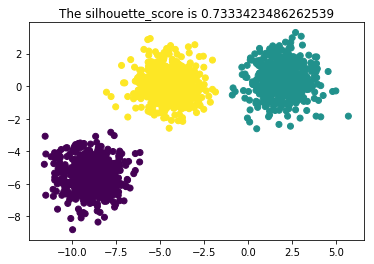

In [74]:
from sklearn.cluster import Birch
y_pred = Birch(n_clusters = 3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
score = metrics.silhouette_score(X, y_pred) 
plt.title('The silhouette_score is {0}'.format(score))

plt.show()

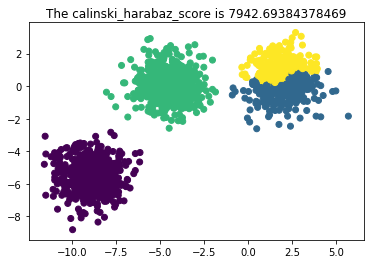

In [9]:
from sklearn.cluster import Birch
y_pred = Birch(n_clusters = 4,threshold = 0.2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
score = metrics.calinski_harabaz_score(X, y_pred) 
plt.title('The calinski_harabaz_score is {0}'.format(score))

plt.show()

# DBSCAN密度聚类算法
应用场景：Non-flat geometry, uneven cluster sizes（非平面几何，不均匀的簇大小）  
和传统的K-Means算法相比，DBSCAN最大的不同就是不需要输入类别数k，当然它最大的优势是可以发现任意形状的聚类簇，而不是像K-Means，一般仅仅使用于凸的样本集聚类。同时它在聚类的同时还可以找出异常点，这点和BIRCH算法类似。

那么我们什么时候需要用DBSCAN来聚类呢？一般来说，如果数据集是稠密的，并且数据集不是凸的，那么用DBSCAN会比K-Means聚类效果好很多。如果数据集不是稠密的，则不推荐用DBSCAN来聚类。


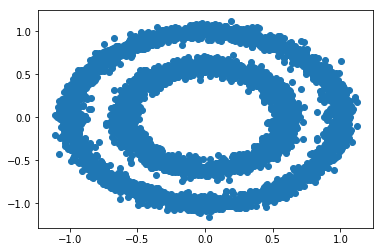

In [69]:
from sklearn.datasets import make_circles 
X, y= make_circles(n_samples=5000, factor=.6,
                                      noise=.05,random_state=9)
X2, y2 = make_blobs(n_samples=1000, n_features=2, centers=[[1.2,1.2]], cluster_std=[[.1]],
               random_state=9)

# X = np.concatenate((X1, X2))
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

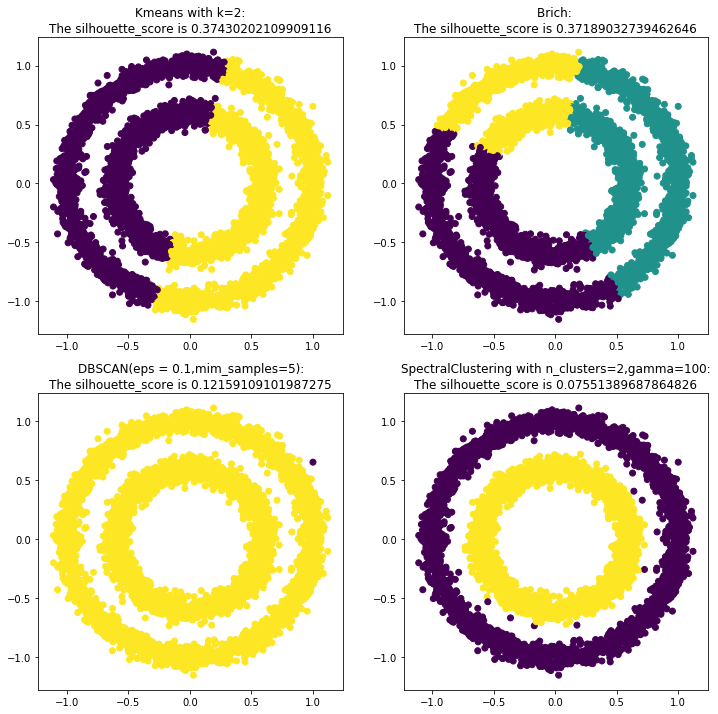

In [102]:
# 现在我们来用K-Means聚类方法来做聚类，首先选择k=3，代码如下：
X, y= make_circles(n_samples=5000, factor=.6,
                                      noise=.05,random_state=9)

plt.figure(figsize=(12, 12))
k=2
y_pred = KMeans(n_clusters=k, random_state=9).fit_predict(X)
plt.subplot(2,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

score = metrics.silhouette_score(X, y_pred) 
plt.title('Kmeans with k={1}:\nThe silhouette_score is {0}'.format(score,k))


y_pred = Birch().fit_predict(X)
plt.subplot(2,2,2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
score = metrics.silhouette_score(X, y_pred) 
plt.title('Brich: \nThe silhouette_score is {0}'.format(score))

eps = 0.1
mim_samples= 5
plt.subplot(2,2,3)
y_pred = DBSCAN(eps = eps,min_samples=mim_samples).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
score = metrics.silhouette_score(X, y_pred) 
plt.title('DBSCAN(eps = {1},mim_samples={2}):\nThe silhouette_score is {0}'.format(score,eps,mim_samples))



n_clusters =2
gamma =100
plt.subplot(2,2,4)
y_pred = SpectralClustering(n_clusters=n_clusters,gamma =gamma).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
score = metrics.silhouette_score(X, y_pred) 
plt.title('SpectralClustering with n_clusters={1},gamma={2}:\nThe silhouette_score is {0}'.format(score,n_clusters,gamma))

plt.show()


# 谱聚类（spectral clustering）

In [97]:
from sklearn.cluster import SpectralClustering


In [89]:
# for index, gamma in enumerate(np.arange(1,100,1)/10):
#     for index, k in enumerate((3,4)):
#         y_pred = SpectralClustering(n_clusters=k, gamma=gamma).fit_predict(X)
#         print( "silhouette_score with gamma=", gamma, "n_clusters=", k,"score:", metrics.silhouette_score(X, y_pred)) 

In [ ]:
from sklearn.cluster import SpectralClustering
y_pred = SpectralClustering(gamma= 0.1, n_clusters= 4).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
score = metrics.silhouette_score(X, y_pred) 
plt.title('The silhouette_score is {0}'.format(score))
plt.show()

## 四种聚类方法的比较

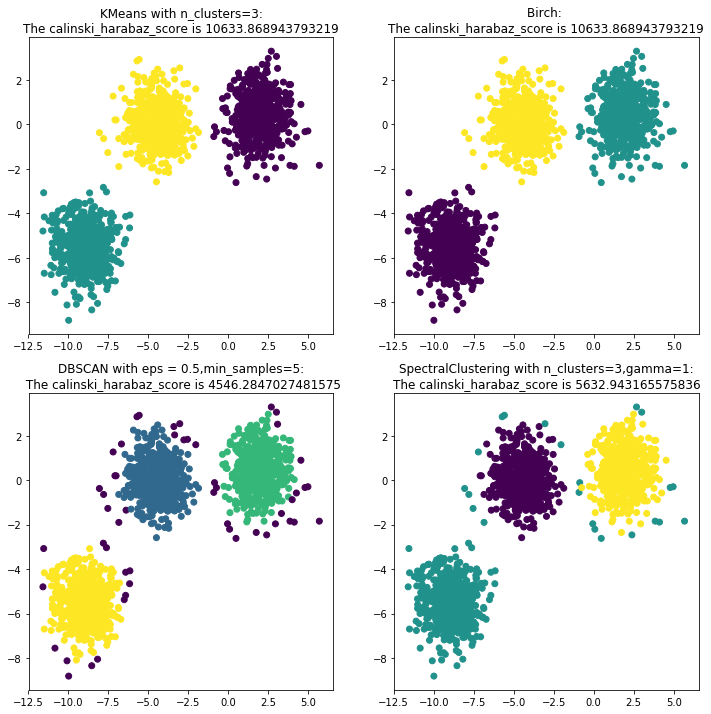

In [101]:
plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# KMeans
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
score = metrics.calinski_harabaz_score(X, y_pred) 
plt.title('KMeans with n_clusters=3:\nThe calinski_harabaz_score is {0}'.format(score))

# Birch
plt.subplot(222)
y_pred = Birch().fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
score = metrics.calinski_harabaz_score(X, y_pred) 
plt.title('Birch: \nThe calinski_harabaz_score is {0}'.format(score))

# DBSCAN
plt.subplot(223)
y_pred = DBSCAN(eps = 0.5,min_samples=5).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
score = metrics.calinski_harabaz_score(X, y_pred) 
plt.title('DBSCAN with eps = 0.5,min_samples=5:\n The calinski_harabaz_score is {0}'.format(score))



#SpectralClustering
plt.subplot(224)
n_clusters =3
gamma =1
y_pred = SpectralClustering(n_clusters=n_clusters,gamma =gamma).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
score = metrics.calinski_harabaz_score(X, y_pred) 
plt.title('SpectralClustering with n_clusters={1},gamma={2}:\nThe calinski_harabaz_score is {0}'.format(score,n_clusters,gamma))

plt.show()

## Anisotropicly distributed data

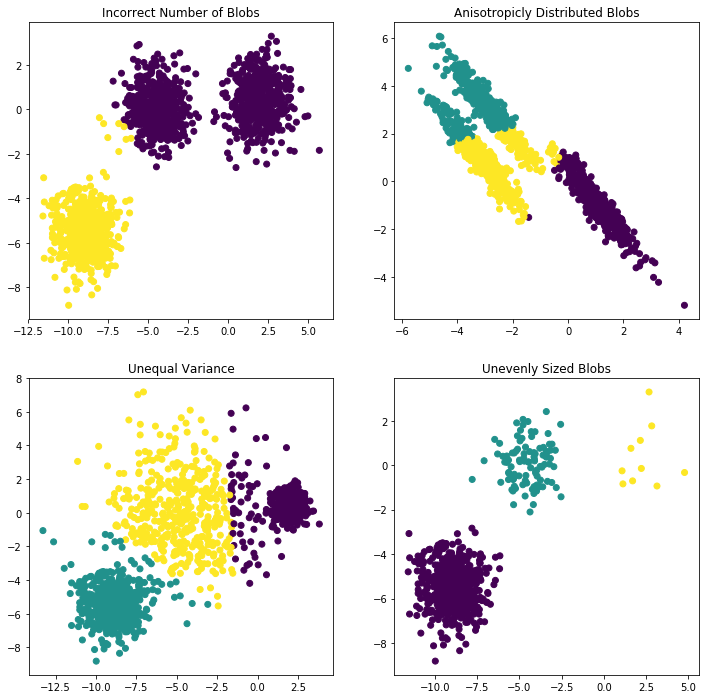

In [19]:
plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")


# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")


# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")


# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()